# Data Loading

In [1]:
Hepta2008 <- read.csv("Data/ProcessedDatasets/2008WomanHeptathlon.csv")
head(Hepta2008)
Hepta2008 <- as.matrix(Hepta2008[4:ncol(Hepta2008)])

,Athlete,Country,Overall.points,X100.m.H,HJ,SP,X200.m,LJ,JT,X800.m
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Nataliya Dobrynska,Ukraine,6733,1059,978,1015,944,1049,833,855
2,Hyleas Fountain,United States,6619,1158,1093,751,1058,969,704,886
3,Kelly Sotherton,Great Britain,6517,1097,1016,785,1040,953,622,1004
4,Jessica Zelinka,Canada,6490,1129,941,780,1016,887,742,995
5,Anna Bogdanova,Russia,6465,1111,1054,799,958,991,579,973
6,Karolina Tyminska,Poland,6428,1033,941,799,1040,1017,590,1008


# PcaMethods

## Probabilistic PCA implementation

In [2]:
# if (!requireNamespace("BiocManager", quietly=TRUE))
#     install.packages("BiocManager")
# BiocManager::install("pcaMethods")

In [ ]:
library("pcaMethods")

In [3]:
pdim3 <- pca(Hepta2008, method="ppca", nPcs=3, seed=123)

### Scores

In [4]:
head(pdim3@scores)

PC1,PC2,PC3
-208.7208,117.42744,-209.28028
-210.6921,-128.73086,-47.78518
-188.2587,-166.32425,-28.48004
-104.7511,-72.82841,-79.56153
-212.6062,-164.65304,-13.66601
-214.8728,-115.95187,28.68121


### Loadings

In [4]:
pdim3@loadings

,PC1,PC2,PC3
X100.m.H,-0.23737177,-0.16820691,-0.193102067
HJ,-0.24480817,-0.49190624,-0.329688209
SP,-0.07107381,0.06320192,-0.685728913
X200.m,-0.23639631,-0.31523847,-0.008417587
LJ,-0.88528583,0.36444512,0.228046800
JT,0.05480220,0.63385605,-0.505738726
X800.m,-0.18988054,-0.30293756,-0.275581705


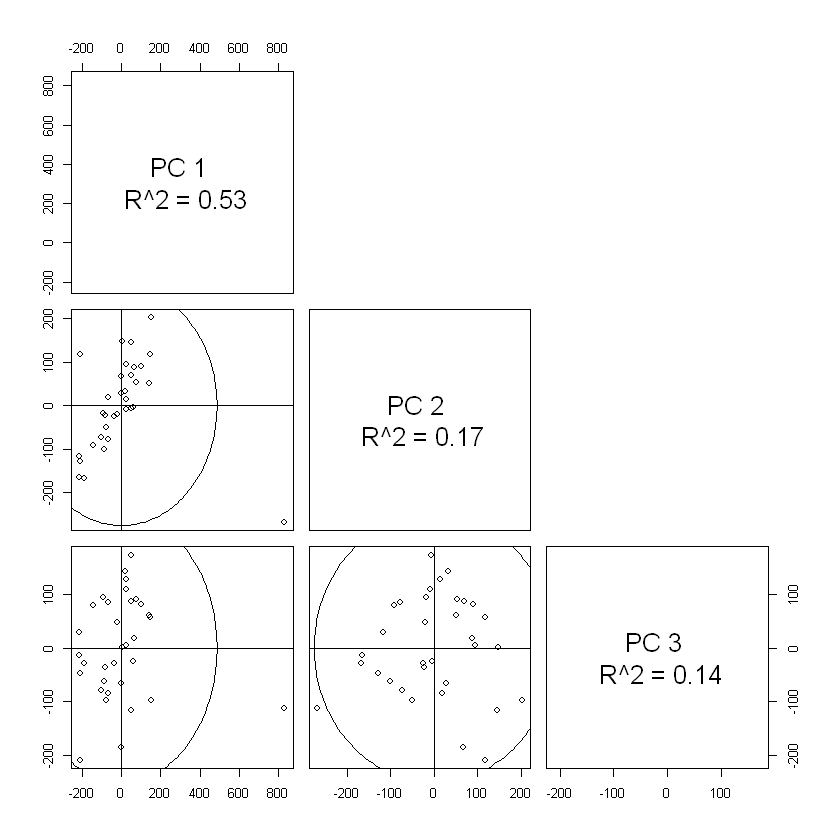

In [7]:
# Get the estimated complete observations
cObs <- completeObs(pdim3)
# Plot the scores
plotPcs(pdim3, type = "scores")

In [12]:
# write.csv(pdim3@loadings,"loadings_pcaM_probabilistic.csv",row.names=FALSE)
# write.csv(pca(Hepta2008, method="ppca", nPcs=5, seed=123)@loadings,"loadings_pcaM_probabilistic5.csv",row.names=FALSE)

Hinton plot can be found in the ``hinton.plots`` notebook, that's why we save the matrix.

## Bayesian PCA implementation

In [6]:
bdim3 <- pca(Hepta2008, method="bpca", nPcs=3, seed=123)

### Scores

In [9]:
head(bdim3@scores)

PC1,PC2,PC3
-1.0963809,0.9316470,1.6939358
-1.1067361,-1.0213263,0.3867775
-0.9888965,-1.3195853,0.2305208
-0.5502426,-0.5778069,0.6439790
-1.1167906,-1.3063261,0.1106143
-1.1286967,-0.9199404,-0.2321470


### Loadings

In [10]:
bdim3@loadings

,PC1,PC2,PC3
X100.m.H,-39.658448,-12.527982,11.5700962
HJ,-40.900871,-36.636963,19.7538400
SP,-11.874524,4.707245,41.0868309
X200.m,-39.495475,-23.478833,0.5043967
LJ,-147.907490,27.143719,-13.6638640
JT,9.155976,47.209336,30.3022703
X800.m,-31.723939,-22.562661,16.5119919


In [8]:
# write.csv(pdim3@loadings,"loadings_pcaM_bayesian.csv",row.names=FALSE)
# write.csv(pca(Hepta2008, method="bpca", nPcs=5, seed=123)@loadings,"loadings_pcaM_bayesian5.csv",row.names=FALSE)

## Plot Comparison

Probabilistic

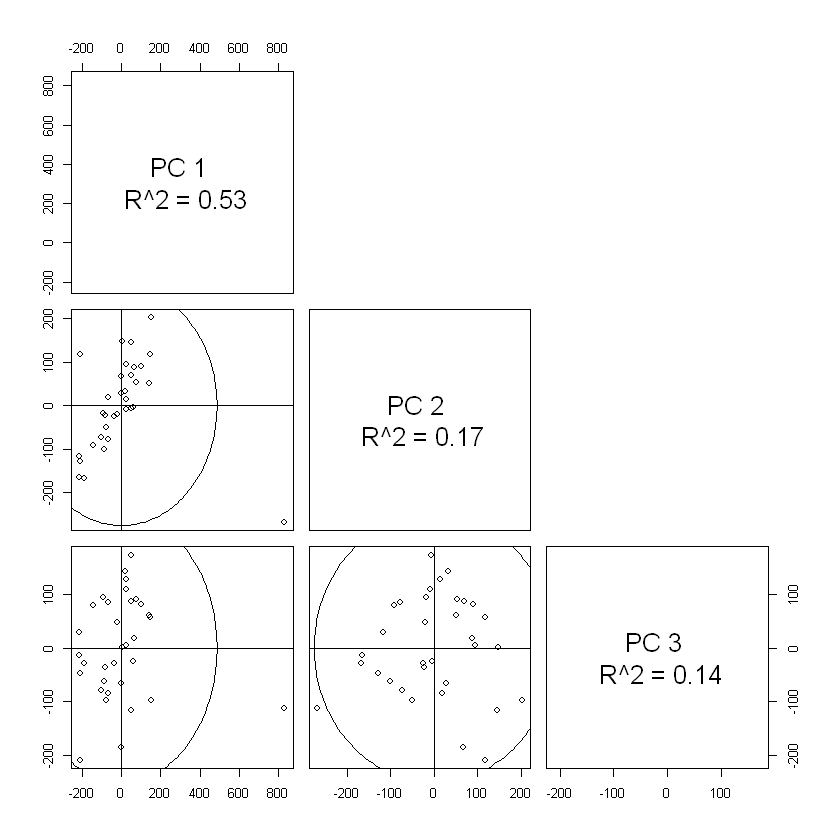

In [15]:
cObs <- completeObs(bdim3)
# Plot the scores
plotPcs(pdim3, type = "scores")

Bayesian

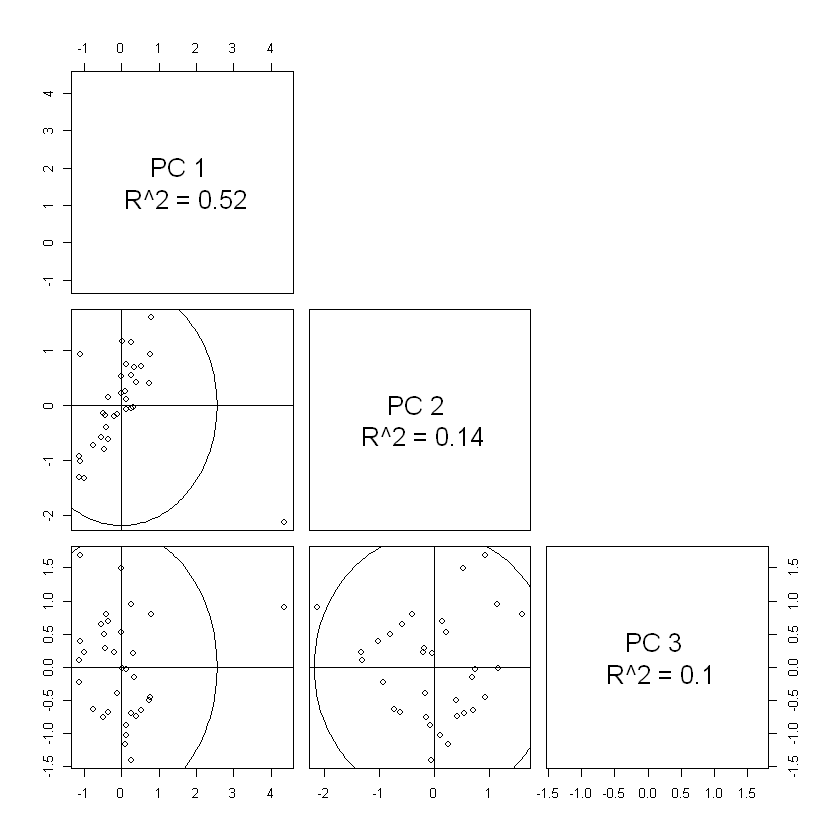

In [16]:
cObs <- completeObs(bdim3)
# Plot the scores
plotPcs(bdim3, type = "scores")

We will now test with only 2 components

Probabilistic

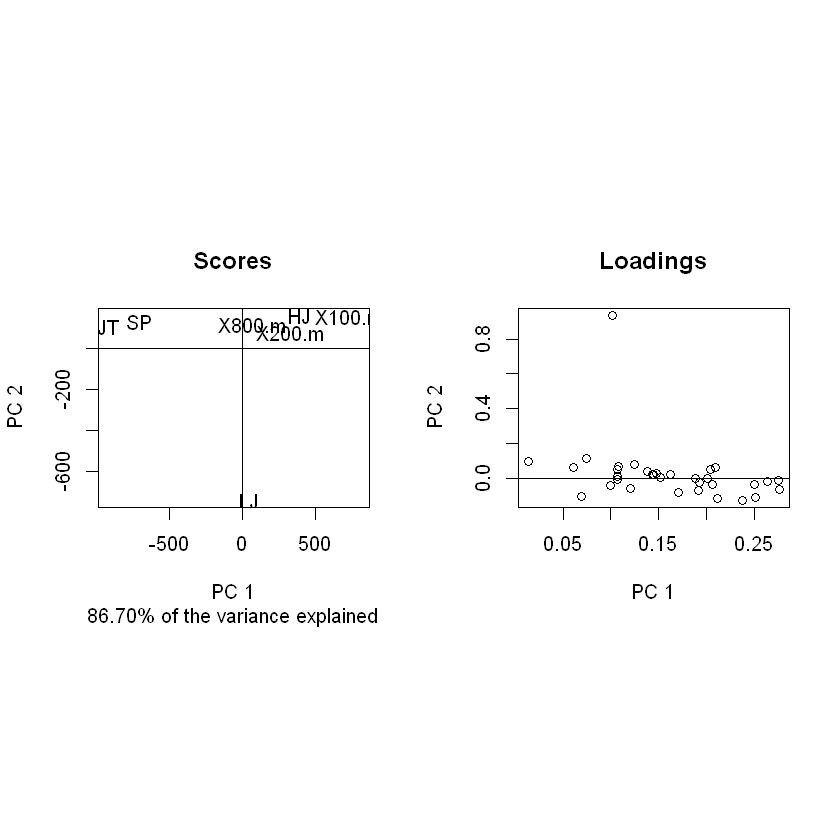

In [19]:
pc <- pca(t(Hepta2008), method="ppca", nPcs=2)
slplot(pc)

Bayesian

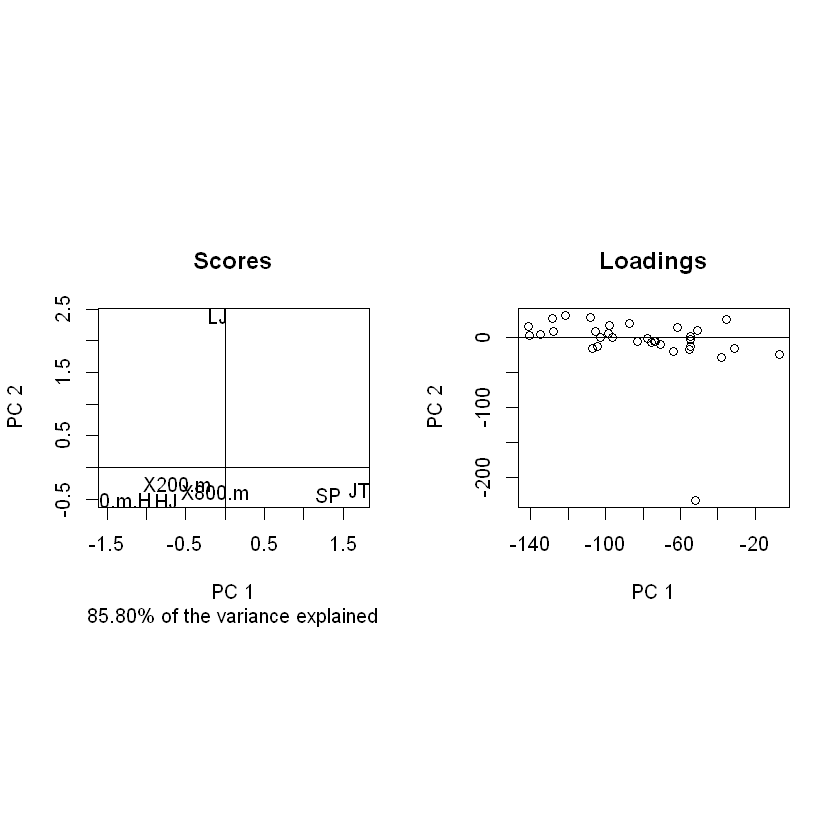

In [20]:
pc <- pca(t(Hepta2008), method="bpca", nPcs=2)
slplot(pc)

Conventional PCA

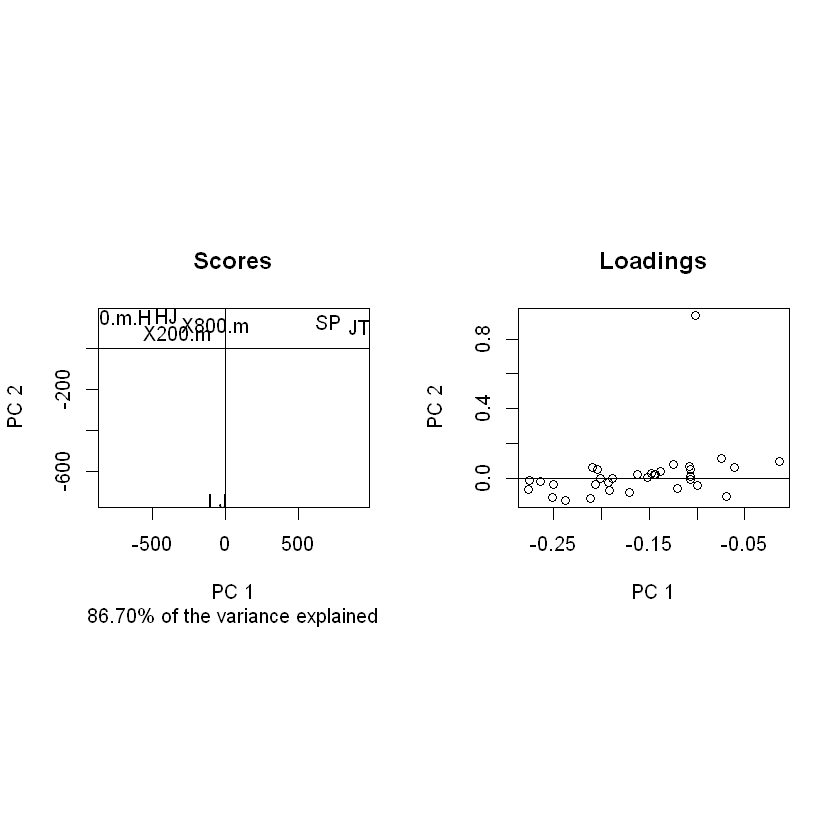

In [23]:
pc <- pca(t(Hepta2008), method="svd", nPcs=2)
slplot(pc)

### All together

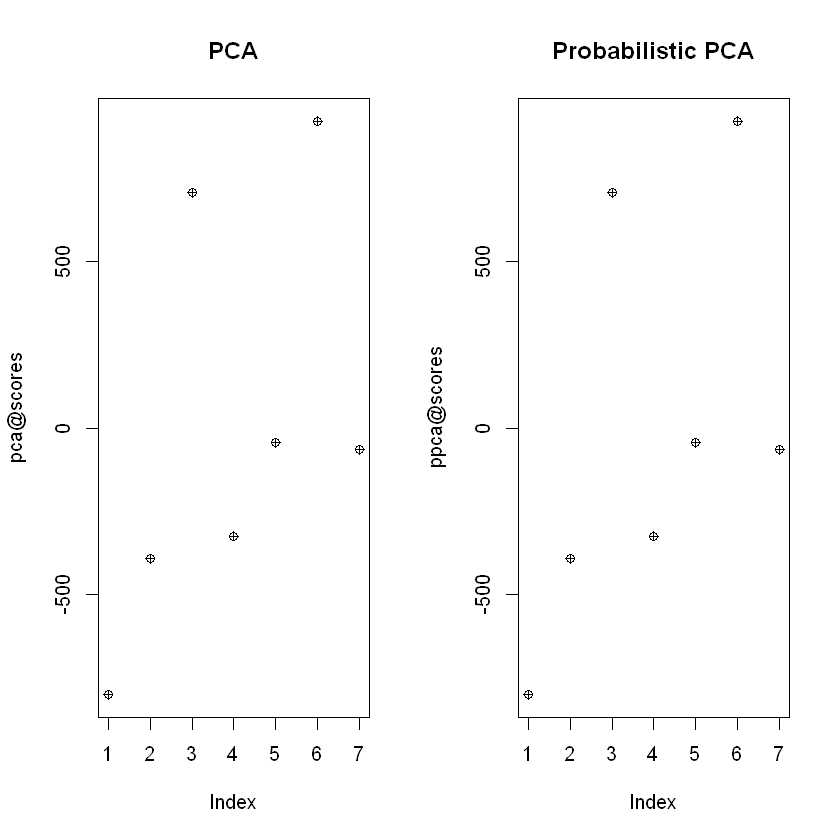

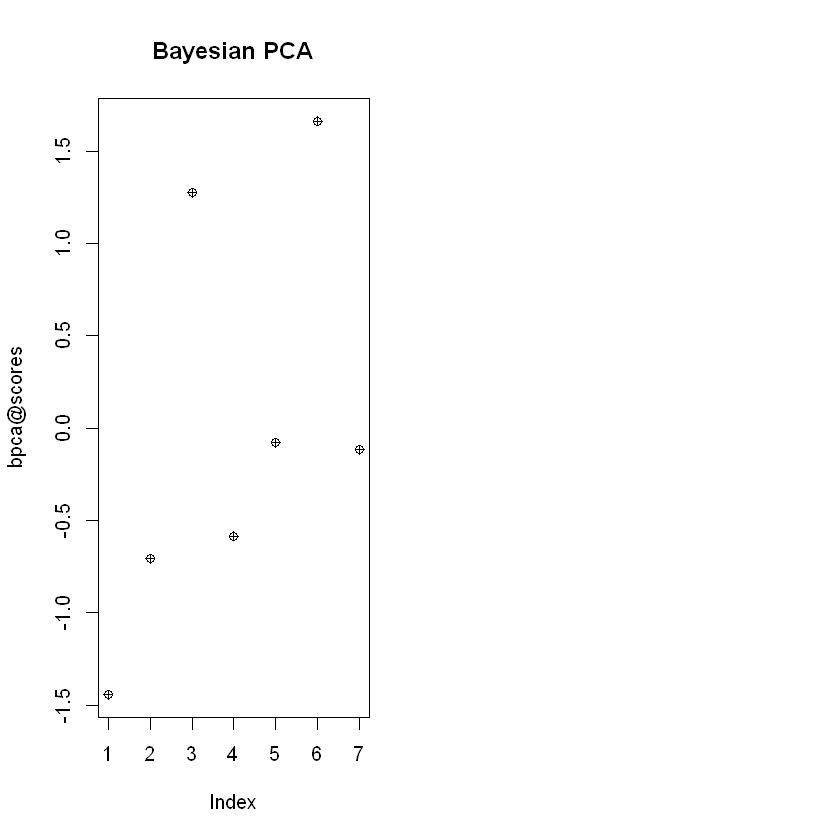

In [8]:
pca <- pca(t(Hepta2008), method="svd", nPcs=1)
ppca <- pca(t(Hepta2008), method="ppca", nPcs=1)
bpca <- pca(t(Hepta2008), method="bpca", nPcs=1)
## Visualize
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(pca@scores,  pch=10,  main="PCA")
plot(ppca@scores, pch=10,  main="Probabilistic PCA")
plot(bpca@scores, pch=10,  main="Bayesian PCA")
par(opar)